<a href="https://colab.research.google.com/github/Smar-na/Complete-Python-3-Bootcamp/blob/master/topicmodelling_sbert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data preprocessing and loading

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'clue.csv'
df = pd.read_csv(file_path)

# Display the first few rows

# Check dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65307 entries, 0 to 65306
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              65307 non-null  object
 1   userName              65307 non-null  object
 2   userImage             65307 non-null  object
 3   content               65301 non-null  object
 4   score                 65307 non-null  int64 
 5   thumbsUpCount         65307 non-null  int64 
 6   reviewCreatedVersion  57012 non-null  object
 7   at                    65307 non-null  object
 8   replyContent          10541 non-null  object
 9   repliedAt             10541 non-null  object
 10  appVersion            57012 non-null  object
dtypes: int64(2), object(9)
memory usage: 5.5+ MB


In [ ]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,124c1e6e-79fd-4b78-abdf-7a37a8b42a74,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The unskippable ads for Clue Plus every time y...,1,0,NaN,15-10-2024 16:20,"Hello, we understand you’re disappointed about...",16-10-2024 06:50,NaN
1,5ce244cb-9725-46d9-a183-d5955714ce8d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,very nicr app,5,0,NaN,15-10-2024 14:56,Thanks for sharing your review here. It means ...,16-10-2024 06:18,NaN
2,db54624d-cee4-4a92-87ed-5ff2e0107547,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,not good,1,0,NaN,15-10-2024 14:51,"Hey, thanks for your review. We’re sorry to he...",16-10-2024 06:51,NaN
3,ff64c2f2-e8fc-4c56-bc1d-94fc37f2366f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Splendid found it helpful hope it'll help me h...,5,0,176,15-10-2024 12:11,Thanks for the positive review! Your feedback ...,15-10-2024 13:02,176
4,0b9bf3e2-785e-4485-bb3c-d43ff0685838,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Clue just keeps getting better and better. Mor...,5,0,163,15-10-2024 11:17,Thanks for the positive review! Your feedback ...,15-10-2024 13:02,163


Split reviews based on ratings

In [ ]:
# Create subsets based on ratings
low_ratings = df[df['score'].isin([1, 2, 3])]
high_ratings = df[df['score'].isin([4, 5])]

print(f"Low ratings reviews: {len(low_ratings)}")
print(f"High ratings reviews: {len(high_ratings)}")

Low ratings reviews: 9847
High ratings reviews: 55460


**info abt the mean review lengths, no of replies and sentiment scores**

In [ ]:
from scipy.stats import ttest_ind
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

# Ensure stopwords are downloaded for word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Function to calculate review length
def calculate_review_length(text):
    tokens = word_tokenize(text) if isinstance(text, str) else []
    return len(tokens)

# Function to calculate sentiment score using TextBlob
def calculate_sentiment(text):
    if isinstance(text, str) and text.strip():
        return TextBlob(text).sentiment.polarity
    return 0  # Neutral sentiment for missing or empty text

# Add calculated columns
df['ReviewLength'] = df['content'].apply(calculate_review_length)
df['SentimentScore'] = df['content'].apply(calculate_sentiment)
df['ReplyReceived'] = df['replyContent'].notnull()

# Create subsets
low_ratings = df[df['score'].isin([1, 2, 3])]
high_ratings = df[df['score'].isin([4, 5])]

# Calculate means for each metric
low_means = {
    "SentimentScore": low_ratings['SentimentScore'].mean(),
    "ReplyReceived": low_ratings['ReplyReceived'].mean(),
    "ReviewLength": low_ratings['ReviewLength'].mean()
}

high_means = {
    "SentimentScore": high_ratings['SentimentScore'].mean(),
    "ReplyReceived": high_ratings['ReplyReceived'].mean(),
    "ReviewLength": high_ratings['ReviewLength'].mean()
}

# T-tests
sentiment_ttest = ttest_ind(low_ratings['SentimentScore'], high_ratings['SentimentScore'], nan_policy='omit')
reply_ttest = ttest_ind(low_ratings['ReplyReceived'], high_ratings['ReplyReceived'])
length_ttest = ttest_ind(low_ratings['ReviewLength'], high_ratings['ReviewLength'], nan_policy='omit')

# Display results
print("Mean Comparison:")
print(f"Low Ratings Mean: {low_means}")
print(f"High Ratings Mean: {high_means}")

print("\nT-Test Results:")
print(f"Sentiment Score T-Test: Statistic={sentiment_ttest.statistic:.2f}, p-value={sentiment_ttest.pvalue:.4f}")
print(f"Reply Received T-Test: Statistic={reply_ttest.statistic:.2f}, p-value={reply_ttest.pvalue:.4f}")
print(f"Review Length T-Test: Statistic={length_ttest.statistic:.2f}, p-value={length_ttest.pvalue:.4f}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Mean Comparison:
Low Ratings Mean: {'SentimentScore': 0.06229785097835948, 'ReplyReceived': 0.7875495074642023, 'ReviewLength': 46.87458109068752}
High Ratings Mean: {'SentimentScore': 0.4170943651086587, 'ReplyReceived': 0.05023440317345835, 'ReviewLength': 18.03954201226109}

T-Test Results:
Sentiment Score T-Test: Statistic=-112.64, p-value=0.0000
Reply Received T-Test: Statistic=262.95, p-value=0.0000
Review Length T-Test: Statistic=112.46, p-value=0.0000


Generating bigrams

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.util import ngrams

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def generate_bigrams(text):
    # Ensure the input is a string
    if not isinstance(text, str):
        return []  # Return an empty list for invalid entries
    tokens = [word for word in word_tokenize(text.lower()) if word.isalnum() and word not in stop_words]
    bigrams = list(ngrams(tokens, 2))
    return [' '.join(bigram) for bigram in bigrams]

# Ensure 'Content' column contains strings, replacing NaN or non-string values with empty strings
#low_ratings['Content'] = low_ratings['content'].fillna('').astype(str)
#high_ratings['Content'] = high_ratings['content'].fillna('').astype(str)

# Generate bigrams
#low_ratings['Bigrams'] = low_ratings['content'].apply(generate_bigrams)
#high_ratings['Bigrams'] = high_ratings['content'].apply(generate_bigrams)
low_ratings.loc[:, 'Content'] = low_ratings['content'].fillna('').astype(str)
high_ratings.loc[:, 'Content'] = high_ratings['content'].fillna('').astype(str)

low_ratings.loc[:, 'Bigrams'] = low_ratings['content'].apply(generate_bigrams)
high_ratings.loc[:, 'Bigrams'] = high_ratings['content'].apply(generate_bigrams)

print(low_ratings['Bigrams'].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [unskippable ads, ads clue, clue plus, plus ev...
2                                                   []
6                                    [unskippable way]
7    [used yet, yet age, age restriction, restricti...
9                    [period tracking, tracking point]
Name: Bigrams, dtype: object


Topic modelling with BERT

In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.3 MB/s eta 0:00:00


In [ ]:
from bertopic import BERTopic

# Flatten bigrams back to text format
low_text = low_ratings['Bigrams'].apply(lambda x: ' '.join(x)).tolist()
high_text = high_ratings['Bigrams'].apply(lambda x: ' '.join(x)).tolist()

# Topic modeling for low ratings
low_model = BERTopic()
low_topics, _ = low_model.fit_transform(low_text)

# Topic modeling for high ratings
high_model = BERTopic()
high_topics, _ = high_model.fit_transform(high_text)

# Get top 10 topics for each
print("Low Ratings Topics:")
print(low_model.get_topic_info().head(10))

print("High Ratings Topics:")
print(high_model.get_topic_info().head(10))


KeyboardInterrupt: 

In [ ]:
# prompt:  save as df and call the head low_model.get_topic_info().head(10))
# high_model.get_topic_info().head(10))

low_topics_df = low_model.get_topic_info()
high_topics_df = high_model.get_topic_info()

Semantic Topic Modeling with SBERT


In [ ]:
!pip install sentence-transformers umap-learn hdbscan bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.8 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic
import umap
import hdbscan

# Use the bigrams as input
low_text = low_ratings['Bigrams'].apply(lambda x: ' '.join(x)).tolist()
high_text = high_ratings['Bigrams'].apply(lambda x: ' '.join(x)).tolist()

# Combine for easier processing later
all_text = low_text + high_text

# Step 1: Generate SBERT embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')  # A lightweight SBERT model
embeddings = model.encode(all_text, show_progress_bar=True)



modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/2041 [00:00<?, ?it/s]

In [ ]:
# Generate SBERT embeddings separately for low and high ratings
low_embeddings = model.encode(low_text, show_progress_bar=True)
high_embeddings = model.encode(high_text, show_progress_bar=True)


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

Batches:   0%|          | 0/1734 [00:00<?, ?it/s]

In [ ]:
# BERTopic for low-rated reviews
low_topic_model = BERTopic()
low_topics, low_probs = low_topic_model.fit_transform(low_text, low_embeddings)

# BERTopic for high-rated reviews
high_topic_model = BERTopic()
high_topics, high_probs = high_topic_model.fit_transform(high_text, high_embeddings)


In [ ]:

# Get topic info for low ratings
low_topic_info = low_topic_model.get_topic_info()
print("Low Ratings Topics:")
print(low_topic_info.head(10))

# Example: View keywords for Topic 1 in low ratings
print("Keywords for Low Ratings - Topic 1:")
print(low_topic_model.get_topic(1))


Low Ratings Topics:
   Topic  Count                                Name  \
0     -1   4624       -1_app_update_period_tracking   
1      0    288      0_sponsorship_makes_give_since   
2      1    270        1_love_used_app_subscription   
3      2    247              2_ads_pop_ups_annoying   
4      3    215              3_days_period_day_next   
5      4    157   4_ovulation_ovulate_ovulating_day   
6      5    154                      5_que_de_la_se   
7      6    154             6_clue_years_plus_track   
8      7    142  7_window_fertile_fertility_removed   
9      8    121      8_pill_reminder_take_reminders   

                                      Representation  \
0  [app, update, period, tracking, track, years, ...   
1      [sponsorship, makes, give, since, , , , , , ]   
2  [love, used, app, subscription, use, new, free...   
3  [ads, pop, ups, annoying, every, ad, premium, ...   
4  [days, period, day, next, says, said, tomorrow...   
5  [ovulation, ovulate, ovulating, day

In [ ]:
# Get topic info for high ratings
high_topic_info = high_topic_model.get_topic_info()
print("High Ratings Topics:")
print(high_topic_info.head(10))

# Example: View keywords for Topic 1 in high ratings
print("Keywords for High Ratings - Topic 1:")
print(high_topic_model.get_topic(1))


High Ratings Topics:
   Topic  Count                                    Name  \
0     -1  17814               -1_cycle_also_clue_period   
1      0   8945               0_gliterful17_hi_zing_ama   
2      1    812                1_great_app_apppppp_appp   
3      2    525                 2_period_know_first_gon   
4      3    516                       3_love_dis_ha_app   
5      4    477      4_accurate_precise_accuracy_pretty   
6      5    427  5_pregnant_ovulation_pregnancy_fertile   
7      6    336                6_good_app_decent_appppp   
8      7    291                 7_years_year_using_used   
9      8    253           8_prepared_idea_tells_prepare   

                                      Representation  \
0  [cycle, also, clue, period, tracking, periods,...   
1  [gliterful17, hi, zing, ama, sponsored, bang, ...   
2  [great, app, apppppp, appp, round, program, , ...   
3  [period, know, first, gon, started, today, goi...   
4  [love, dis, ha, app, politics, ttack, trisha, 

In [ ]:
import pandas as pd

# Create a DataFrame for low ratings
low_data = pd.DataFrame({
    'Review': low_text,
    'Topic': low_topics
})

# Topic distribution for low ratings
low_distribution = low_data['Topic'].value_counts().reset_index()
low_distribution.columns = ['Topic', 'Count']
print("Low Ratings Topic Distribution:")
print(low_distribution)


Low Ratings Topic Distribution:
     Topic  Count
0       -1   4624
1        0    288
2        1    270
3        2    247
4        3    215
..     ...    ...
103    102     11
104    103     10
105    104     10
106    105     10
107    106     10

[108 rows x 2 columns]


In [ ]:
# Create a DataFrame for high ratings
high_data = pd.DataFrame({
    'Review': high_text,
    'Topic': high_topics
})

# Topic distribution for high ratings
high_distribution = high_data['Topic'].value_counts().reset_index()
high_distribution.columns = ['Topic', 'Count']
print("High Ratings Topic Distribution:")
print(high_distribution)


High Ratings Topic Distribution:
     Topic  Count
0       -1  17814
1        0   8945
2        1    812
3        2    525
4        3    516
..     ...    ...
614    613     10
615    614     10
616    615     10
617    616     10
618    617     10

[619 rows x 2 columns]


In [ ]:
# Save to CSV
low_distribution.to_csv("low_rating_topic_distribution_clue.csv", index=False)
high_distribution.to_csv("high_rating_topic_distribution_clue.csv", index=False)

In [ ]:
# prompt: # BERTopic for low-rated reviews
# low_topic_model = BERTopic()
# low_topics, low_probs = low_topic_model.fit_transform(low_text, low_embeddings)
# # BERTopic for high-rated reviews
# high_topic_model = BERTopic()
# high_topics, high_probs = high_topic_model.fit_transform(high_text, high_embeddings)
# this as csv in detail

# Get detailed topic information for low ratings
low_topic_info_detailed = low_topic_model.get_topic_info()
low_topic_info_detailed.to_csv("low_rating_topics_detailed_clue.csv", index=False)

# Get detailed topic information for high ratings
high_topic_info_detailed = high_topic_model.get_topic_info()
high_topic_info_detailed.to_csv("high_rating_topics_detailed_clue.csv", index=False)

In [ ]:
# Extract years from the 'at' column
def extract_year(timestamp):
    # Handle cases where the timestamp is missing or not a string
    if isinstance(timestamp, str):
        try:
            # Split the timestamp and extract the year
            return timestamp.split('-')[2].split()[0]  # Get the year part
        except IndexError:
            return None  # Handle malformed data
    return None  # Handle non-string cases

# Add the Year column to the dataset
df['Year'] = df['at'].apply(extract_year)

# Convert Year to integer for further analysis (optional)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')


In [ ]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,ReviewLength,SentimentScore,ReplyReceived,Year
0,124c1e6e-79fd-4b78-abdf-7a37a8b42a74,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The unskippable ads for Clue Plus every time y...,1,0,NaN,15-10-2024 16:20,"Hello, we understand you’re disappointed about...",16-10-2024 06:50,NaN,22,-0.400000,True,2024
1,5ce244cb-9725-46d9-a183-d5955714ce8d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,very nicr app,5,0,NaN,15-10-2024 14:56,Thanks for sharing your review here. It means ...,16-10-2024 06:18,NaN,3,0.200000,True,2024
2,db54624d-cee4-4a92-87ed-5ff2e0107547,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,not good,1,0,NaN,15-10-2024 14:51,"Hey, thanks for your review. We’re sorry to he...",16-10-2024 06:51,NaN,2,-0.350000,True,2024
3,ff64c2f2-e8fc-4c56-bc1d-94fc37f2366f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Splendid found it helpful hope it'll help me h...,5,0,176,15-10-2024 12:11,Thanks for the positive review! Your feedback ...,15-10-2024 13:02,176,12,0.833333,True,2024
4,0b9bf3e2-785e-4485-bb3c-d43ff0685838,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Clue just keeps getting better and better. Mor...,5,0,163,15-10-2024 11:17,Thanks for the positive review! Your feedback ...,15-10-2024 13:02,163,31,0.300000,True,2024


In [ ]:
# Ensure Year column is correctly generated
if 'Year' not in df.columns:
    def extract_year(timestamp):
        # Handle cases where the timestamp is missing or not a string
        if isinstance(timestamp, str):
            try:
                # Split the timestamp and extract the year
                return timestamp.split('-')[2].split()[0]  # Get the year part
            except IndexError:
                return None  # Handle malformed data
        return None  # Handle non-string cases

    # Add the Year column to the dataset
    df['Year'] = df['at'].apply(extract_year)

    # Convert Year to numeric for consistent analysis
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Add ReplyReceived column to track if a review received a reply
df['ReplyReceived'] = df['replyContent'].notnull()

# Function to get representative documents and their statistics
def get_representative_docs_and_stats(model, text_data, original_df, top_n=10):
    try:
        topic_docs = model.get_representative_docs()
        topics_info = model.get_topic_info().head(top_n)  # Top N topics
    except AttributeError as e:
        print(f"Error accessing topics: {e}")
        return []

    # Collect statistics for each topic
    topic_stats = []
    for topic_id in topics_info['Topic']:
        if topic_id == -1:  # Skip outliers if any
            continue

        # Extract documents and filter corresponding rows in the original DataFrame
        docs = topic_docs.get(topic_id, [])
        filtered_df = original_df[original_df['content'].isin(docs)]

        # Ensure filtered DataFrame is valid
        if filtered_df.empty:
            print(f"No data found for Topic {topic_id}")
            continue

        # Calculate metrics
        reply_count = filtered_df['ReplyReceived'].sum()
        content_count = len(filtered_df)
        years = filtered_df['Year'].dropna().value_counts().to_dict()  # Count reviews by year

        # Append stats
        topic_stats.append({
            "Topic": topic_id,
            "Keywords": topics_info[topics_info['Topic'] == topic_id]['Name'].values[0],
            "ReplyCount": reply_count,
            "ContentCount": content_count,
            "YearDistribution": years
        })

    return topic_stats

# Representative stats for low and high ratings
low_topic_stats = get_representative_docs_and_stats(low_topic_model, low_text, low_ratings)
high_topic_stats = get_representative_docs_and_stats(high_topic_model, high_text, high_ratings)

# Display results
print("Low Ratings Topics and Stats:")
for stat in low_topic_stats:
    print(stat)

print("\nHigh Ratings Topics and Stats:")
for stat in high_topic_stats:
    print(stat)


No data found for Topic 0
No data found for Topic 1
No data found for Topic 2
No data found for Topic 3
No data found for Topic 4
No data found for Topic 5
No data found for Topic 6
No data found for Topic 7
No data found for Topic 8
No data found for Topic 0


KeyError: 'Year'

In [ ]:
# Ensure 'Bigrams' column exists in the original DataFrame
low_ratings['Bigrams_Text'] = low_ratings['Bigrams'].apply(lambda x: ' '.join(x))
high_ratings['Bigrams_Text'] = high_ratings['Bigrams'].apply(lambda x: ' '.join(x))

# Function to get representative documents and stats for all topics (including outliers)
def get_all_docs_and_stats(model, original_df, bigrams_column='Bigrams_Text'):
    try:
        topic_docs = model.get_representative_docs()
        topics_info = model.get_topic_info()  # Get all topics
    except AttributeError as e:
        print(f"Error accessing topics: {e}")
        return []

    # Collect statistics for each topic
    topic_stats = []
    for topic_id in topics_info['Topic']:
        # Extract representative documents for this topic
        docs = topic_docs.get(topic_id, [])

        # Map back to the original DataFrame
        filtered_df = original_df[original_df[bigrams_column].isin(docs)]

        if filtered_df.empty:
            print(f"No matching data found for Topic {topic_id}")
            continue

        # Calculate metrics
        reply_count = filtered_df['ReplyReceived'].sum()
        content_count = len(filtered_df)
        years = df['Year'].dropna().value_counts().to_dict()

        # Append stats
        topic_stats.append({
            "Topic": topic_id,
            "Keywords": topics_info[topics_info['Topic'] == topic_id]['Name'].values[0],
            "ReplyCount": reply_count,
            "ContentCount": content_count,
            "YearDistribution": years
        })

    return topic_stats

# Generate stats for all topics (low and high ratings)
low_topic_stats = get_all_docs_and_stats(low_topic_model, low_ratings)
high_topic_stats = get_all_docs_and_stats(high_topic_model, high_ratings)

# Display stats
print("Low Ratings Topics and Stats:")
for stat in low_topic_stats:
    print(stat)

print("\nHigh Ratings Topics and Stats:")
for stat in high_topic_stats:
    print(stat)


Low Ratings Topics and Stats:
{'Topic': -1, 'Keywords': '-1_app_update_period_tracking', 'ReplyCount': 2, 'ContentCount': 3, 'YearDistribution': {2017: 16885, 2019: 12004, 2020: 9270, 2018: 8786, 2021: 5036, 2023: 4135, 2016: 3235, 2022: 2523, 2024: 1884, 2015: 1339, 2014: 210}}
{'Topic': 0, 'Keywords': '0_sponsorship_makes_give_since', 'ReplyCount': 199, 'ContentCount': 288, 'YearDistribution': {2017: 16885, 2019: 12004, 2020: 9270, 2018: 8786, 2021: 5036, 2023: 4135, 2016: 3235, 2022: 2523, 2024: 1884, 2015: 1339, 2014: 210}}
{'Topic': 1, 'Keywords': '1_love_used_app_subscription', 'ReplyCount': 2, 'ContentCount': 3, 'YearDistribution': {2017: 16885, 2019: 12004, 2020: 9270, 2018: 8786, 2021: 5036, 2023: 4135, 2016: 3235, 2022: 2523, 2024: 1884, 2015: 1339, 2014: 210}}
{'Topic': 2, 'Keywords': '2_ads_pop_ups_annoying', 'ReplyCount': 0, 'ContentCount': 3, 'YearDistribution': {2017: 16885, 2019: 12004, 2020: 9270, 2018: 8786, 2021: 5036, 2023: 4135, 2016: 3235, 2022: 2523, 2024: 1884, 

In [ ]:
import pandas as pd

# Load detailed SBERT topics from earlier exports
low_sbert_topics = pd.read_csv("low_rating_topics_detailed_clue.csv")
high_sbert_topics = pd.read_csv("high_rating_topics_detailed_clue.csv")

# Convert topic keywords to sets for comparison
low_sbert_keywords = {row['Topic']: row['Name'] for _, row in low_sbert_topics.iterrows()}
high_sbert_keywords = {row['Topic']: row['Name'] for _, row in high_sbert_topics.iterrows()}

# Function to compare topics between two sets
def compare_topics(current_topics, sbert_keywords, category="low"):
    mismatched_topics = []
    for topic_stat in current_topics:
        topic_id = topic_stat['Topic']
        current_keywords = topic_stat['Keywords']

        if topic_id in sbert_keywords:
            sbert_topic_keywords = sbert_keywords[topic_id]
            if current_keywords != sbert_topic_keywords:
                mismatched_topics.append({
                    "TopicID": topic_id,
                    "CurrentKeywords": current_keywords,
                    "SBERTKeywords": sbert_topic_keywords,
                    "Category": category
                })
        else:
            # Topic ID not found in SBERT results
            mismatched_topics.append({
                "TopicID": topic_id,
                "CurrentKeywords": current_keywords,
                "SBERTKeywords": "Not Found",
                "Category": category
            })
    return mismatched_topics

# Verify low ratings topics
low_mismatches = compare_topics(low_topic_stats, low_sbert_keywords, category="low")

# Verify high ratings topics
high_mismatches = compare_topics(high_topic_stats, high_sbert_keywords, category="high")

# Display mismatches
print("Low Ratings Topic Mismatches:")
for mismatch in low_mismatches:
    print(mismatch)

print("\nHigh Ratings Topic Mismatches:")
for mismatch in high_mismatches:
    print(mismatch)


Low Ratings Topic Mismatches:

High Ratings Topic Mismatches:


top 10 topics

In [ ]:
import pandas as pd

# Convert the low and high topic stats to DataFrames
low_topic_stats_df = pd.DataFrame(low_topic_stats)
high_topic_stats_df = pd.DataFrame(high_topic_stats)

# Add a column to distinguish between low and high ratings
low_topic_stats_df['RatingCategory'] = 'Low'
high_topic_stats_df['RatingCategory'] = 'High'

# Concatenate the two DataFrames
combined_topics_df = pd.concat([low_topic_stats_df, high_topic_stats_df], ignore_index=True)

# Save the combined DataFrame to a CSV file
combined_topics_df.to_csv("combined_rating_topics_clue.csv", index=False)

print("Combined topics saved to 'combined_rating_topics_clue.csv'")


Combined topics saved to 'combined_rating_topics_clue.csv'


In [ ]:
import pandas as pd

# Convert the low and high topic stats to DataFrames
low_topic_stats_df = pd.DataFrame(low_topic_stats)
high_topic_stats_df = pd.DataFrame(high_topic_stats)

# Add a column to distinguish between low and high ratings
low_topic_stats_df['RatingCategory'] = 'Low'
high_topic_stats_df['RatingCategory'] = 'High'

# Save each DataFrame to a separate CSV file
low_topic_stats_df.to_csv("low_rating_topics_clue.csv", index=False)
high_topic_stats_df.to_csv("high_rating_topics_clue.csv", index=False)

print("Low and High rating topics saved to 'low_rating_topics_clue.csv' and 'high_rating_topics_clue.csv'")


Low and High rating topics saved to 'low_rating_topics_clue.csv' and 'high_rating_topics_clue.csv'


In [ ]:
# Fit BERTopic for low-rated reviews with a maximum of 10 topics
low_topic_model = BERTopic(nr_topics=10)
low_topics, low_probs = low_topic_model.fit_transform(low_text, low_embeddings)

# Fit BERTopic for high-rated reviews with a maximum of 10 topics
high_topic_model = BERTopic(nr_topics=10)
high_topics, high_probs = high_topic_model.fit_transform(high_text, high_embeddings)


In [ ]:
# Get topic info for low ratings
low_topic_info = low_topic_model.get_topic_info()
print("Low Ratings Topics and Keywords:")
print(low_topic_info)

# Get topic info for high ratings
high_topic_info = high_topic_model.get_topic_info()
print("High Ratings Topics and Keywords:")
print(high_topic_info)


Low Ratings Topics and Keywords:
   Topic  Count                               Name  \
0     -1   4487         -1_app_period_update_years   
1      0   4320           0_app_period_update_used   
2      1    288     1_sponsorship_makes_give_since   
3      2    203      2_account_email_sign_password   
4      3    181            3_working_good_use_work   
5      4    155                     4_que_de_la_se   
6      5    127  5_subscription_pay_charged_cancel   
7      6     56                  6_wo_open_ini_let   
8      7     18              7_stars_star_give_day   
9      8     12               8_geen_m6_voor_werkt   

                                      Representation  \
0  [app, period, update, years, track, data, trac...   
1  [app, period, update, used, use, track, like, ...   
2      [sponsorship, makes, give, since, , , , , , ]   
3  [account, email, sign, password, log, let, ver...   
4  [working, good, use, work, hard, really, confu...   
5       [que, de, la, se, para, es, 

In [ ]:
# Function to extract reviews for a specific topic
def get_reviews_by_topic(text, topics, topic_id):
    return [text[i] for i, t in enumerate(topics) if t == topic_id]

# Retrieve reviews for each topic for low-rated reviews
low_topic_reviews = {}
for topic_id in low_topic_info['Topic'].unique():
    if topic_id != -1:  # Exclude outliers
        low_topic_reviews[topic_id] = get_reviews_by_topic(low_text, low_topics, topic_id)

# Retrieve reviews for each topic for high-rated reviews
high_topic_reviews = {}
for topic_id in high_topic_info['Topic'].unique():
    if topic_id != -1:  # Exclude outliers
        high_topic_reviews[topic_id] = get_reviews_by_topic(high_text, high_topics, topic_id)

# Example: View reviews for a specific topic in low ratings
print(f"Reviews for Low Ratings - Topic 1:")
print(low_topic_reviews[1][:10])  # First 5 reviews for topic 1

print(f"Reviews for High Ratings - Topic 1:")
print(high_topic_reviews[1][:10])  # First 5 reviews for topic 1


Reviews for Low Ratings - Topic 1:
['', '', '', '', '']
Reviews for High Ratings - Topic 1:
['', 'like love love articles', 'big like', '', '']


In [ ]:
import pandas as pd

# Convert low ratings topics and reviews to DataFrame
low_topic_df = pd.DataFrame([
    {"Topic": topic, "Keywords": low_topic_model.get_topic(topic), "Reviews": reviews}
    for topic, reviews in low_topic_reviews.items()
])

# Convert high ratings topics and reviews to DataFrame
high_topic_df = pd.DataFrame([
    {"Topic": topic, "Keywords": high_topic_model.get_topic(topic), "Reviews": reviews}
    for topic, reviews in high_topic_reviews.items()
])

# Save to CSV
low_topic_df.to_csv("low_ratings_topics_clue.csv", index=False)
high_topic_df.to_csv("high_ratings_topics_clue.csv", index=False)

print("Saved low and high ratings topics with reviews.")


Saved low and high ratings topics with reviews.


sentiment analysis

In [ ]:
!pip install nltk
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Function to compute sentiment score
def calculate_sentiment(review):
    if isinstance(review, float) or review is None:  # Handle NaN or non-string values
        return 0  # Default sentiment score for invalid reviews
    review = str(review).strip()  # Convert to string and strip whitespace
    if not review:  # Check for empty strings
        return 0
    score = analyzer.polarity_scores(review)
    return score['compound']

# Apply the function
low_ratings['SentimentScore'] = low_ratings['content'].apply(calculate_sentiment)
high_ratings['SentimentScore'] = high_ratings['content'].apply(calculate_sentiment)


In [ ]:
# Add topics to original low and high DataFrames
low_ratings['Topic'] = low_topics
high_ratings['Topic'] = high_topics

# Calculate average sentiment score per topic
low_topic_sentiments = low_ratings.groupby('Topic')['SentimentScore'].mean().reset_index()
high_topic_sentiments = high_ratings.groupby('Topic')['SentimentScore'].mean().reset_index()

# Add counts to understand topic distribution
low_topic_sentiments['ReviewCount'] = low_ratings['Topic'].value_counts().values
high_topic_sentiments['ReviewCount'] = high_ratings['Topic'].value_counts().values

print("Low Ratings Topic Sentiment Analysis:")
print(low_topic_sentiments)

print("High Ratings Topic Sentiment Analysis:")
print(high_topic_sentiments)


Low Ratings Topic Sentiment Analysis:
   Topic  SentimentScore  ReviewCount
0     -1        0.056142         4487
1      0        0.068601         4320
2      1        0.026850          288
3      2       -0.009610          203
4      3       -0.010072          181
5      4       -0.212595          155
6      5       -0.051559          127
7      6        0.084520           56
8      7        0.041733           18
9      8       -0.049950           12
High Ratings Topic Sentiment Analysis:
   Topic  SentimentScore  ReviewCount
0     -1        0.637485        25715
1      0        0.587761        17171
2      1        0.462125        11336
3      2        0.038800          463
4      3        0.471286          273
5      4        0.252692          244
6      5        0.438126          163
7      6        0.465611           61
8      7        0.000000           17
9      8        0.267153           17


In [ ]:
# Save low and high sentiment analysis with topics
low_topic_sentiments.to_csv("low_ratings_sentiment_clue.csv", index=False)
high_topic_sentiments.to_csv("high_ratings_sentiment_clue.csv", index=False)


In [ ]:
# Summary statistics for sentiment scores
low_sentiment_stats = low_ratings['SentimentScore'].describe()
high_sentiment_stats = high_ratings['SentimentScore'].describe()

print("Low Ratings Sentiment Statistics:")
print(low_sentiment_stats)

print("\nHigh Ratings Sentiment Statistics:")
print(high_sentiment_stats)


Low Ratings Sentiment Statistics:
count    9847.000000
mean        0.052565
std         0.531110
min        -0.978200
25%        -0.392750
50%         0.000000
75%         0.502300
max         0.991800
Name: SentimentScore, dtype: float64

High Ratings Sentiment Statistics:
count    55460.000000
mean         0.569993
std          0.307637
min         -0.976100
25%          0.440400
50%          0.636900
75%          0.799600
max          0.995600
Name: SentimentScore, dtype: float64


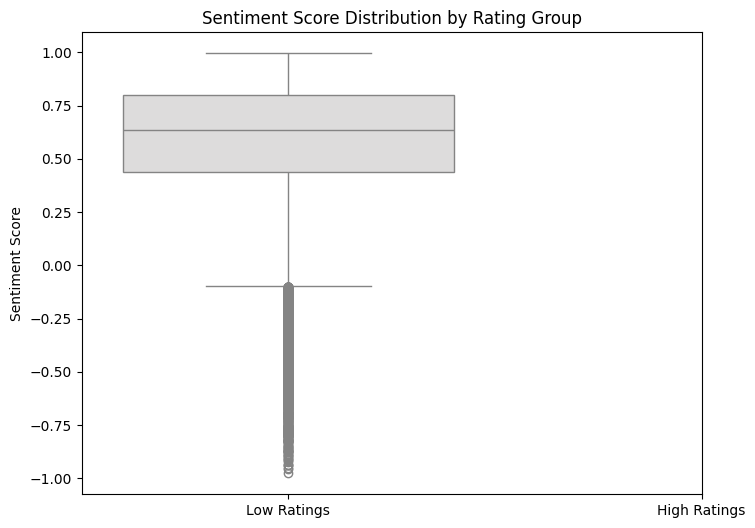

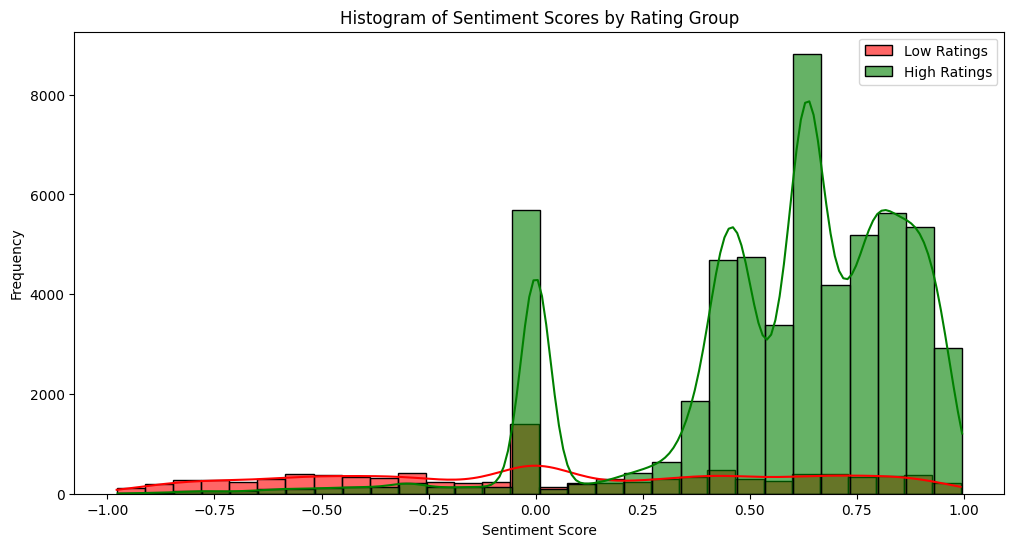

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for sentiment scores
plt.figure(figsize=(8, 6))
sns.boxplot(data=[low_ratings['SentimentScore'], high_ratings['SentimentScore']], palette='coolwarm')
plt.xticks([0, 1], ['Low Ratings', 'High Ratings'])
plt.title('Sentiment Score Distribution by Rating Group')
plt.ylabel('Sentiment Score')
plt.show()

# Histogram for sentiment scores
plt.figure(figsize=(12, 6))
sns.histplot(low_ratings['SentimentScore'], color='red', label='Low Ratings', kde=True, bins=30, alpha=0.6)
sns.histplot(high_ratings['SentimentScore'], color='green', label='High Ratings', kde=True, bins=30, alpha=0.6)
plt.title('Histogram of Sentiment Scores by Rating Group')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
# Average sentiment score by topic
low_topic_sentiments = low_ratings.groupby('Topic')['SentimentScore'].mean().reset_index()
high_topic_sentiments = high_ratings.groupby('Topic')['SentimentScore'].mean().reset_index()

print("Low Ratings Sentiment by Topic:")
print(low_topic_sentiments)

print("\nHigh Ratings Sentiment by Topic:")
print(high_topic_sentiments)


Low Ratings Sentiment by Topic:
   Topic  SentimentScore
0     -1        0.056142
1      0        0.068601
2      1        0.026850
3      2       -0.009610
4      3       -0.010072
5      4       -0.212595
6      5       -0.051559
7      6        0.084520
8      7        0.041733
9      8       -0.049950

High Ratings Sentiment by Topic:
   Topic  SentimentScore
0     -1        0.637485
1      0        0.587761
2      1        0.462125
3      2        0.038800
4      3        0.471286
5      4        0.252692
6      5        0.438126
7      6        0.465611
8      7        0.000000
9      8        0.267153


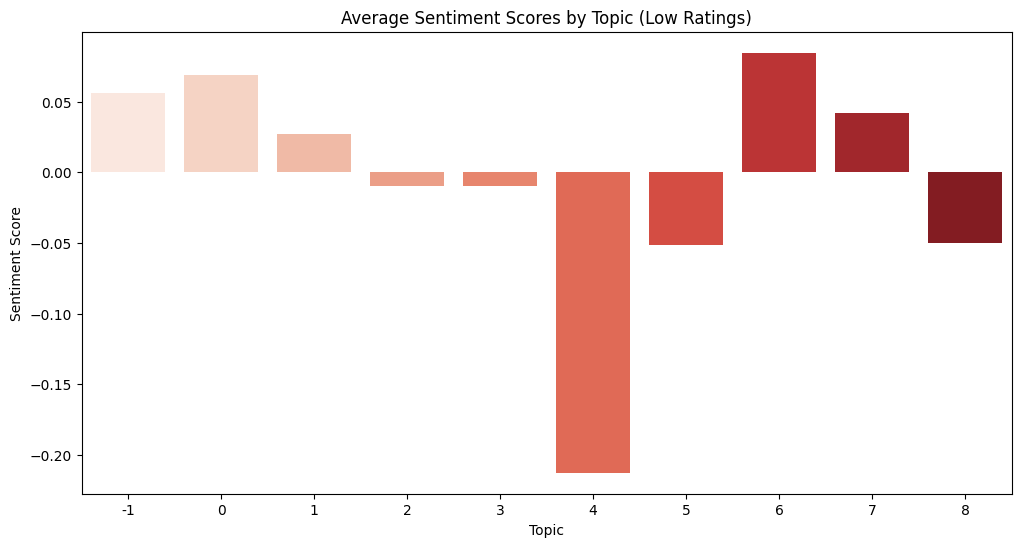

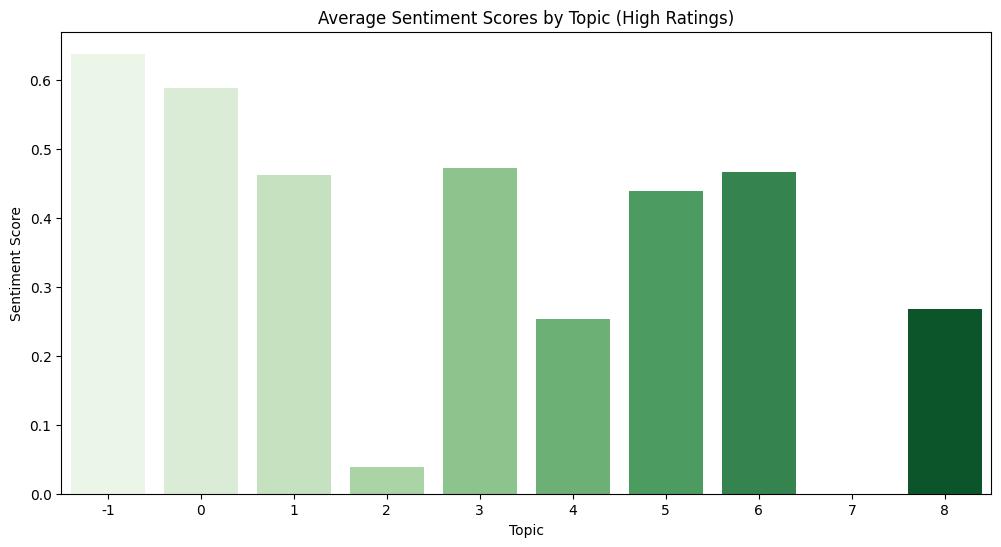

In [ ]:
# Plot low rating topic sentiments
plt.figure(figsize=(12, 6))
sns.barplot(x='Topic', y='SentimentScore', data=low_topic_sentiments, palette='Reds')
plt.title('Average Sentiment Scores by Topic (Low Ratings)')
plt.xlabel('Topic')
plt.ylabel('Sentiment Score')
plt.show()

# Plot high rating topic sentiments
plt.figure(figsize=(12, 6))
sns.barplot(x='Topic', y='SentimentScore', data=high_topic_sentiments, palette='Greens')
plt.title('Average Sentiment Scores by Topic (High Ratings)')
plt.xlabel('Topic')
plt.ylabel('Sentiment Score')
plt.show()
